In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False

import json
import folium

In [3]:
#2018년, test16은 2019년거 제거해야 함
test7=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201801_02.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test8=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201803_04.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test9=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201805.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test10=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201806.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test11=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201807.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test12=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201808.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test13=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201809.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test14=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201810.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test15=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201811.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')
test16=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201812_201905.csv' ,parse_dates=['대여일자','대여시간'],encoding='CP949')

In [4]:
#2019년인 행의 index 명을 date_2019 객체에 저장
date_2019=test16[test16['대여일자'].dt.year==2019].index
test16 =test16.drop(date_2019)
test16

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2018-12-01,00,1721,1721. 창동역 2번출구,정기권,\N,~10대,1,25.95,0.26,1130.0,4
1,2018-12-01,00,3511,3511. 응봉역 1번출구,정기권,\N,~10대,1,52.59,0.39,1660.0,72
2,2018-12-01,00,1975,1975. 대림역 1번 출입구 밑,정기권,\N,~10대,1,136.26,1.17,5060.0,21
3,2018-12-01,00,110,110. 사천교,정기권,\N,~10대,1,17.76,0.16,690.0,2
4,2018-12-01,00,749,749. 이대 목동병원 앞,정기권,\N,~10대,1,95.67,0.70,3020.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
460031,2018-12-31,23,1623,1623. 노원 구민회관,일일권,M,30대,1,38.00,0.23,1010.0,6
460032,2018-12-31,23,394,394. 경희궁 자이 3단지,일일권,M,40대,1,64.86,0.54,2340.0,26
460033,2018-12-31,23,207,207. 여의나루역 1번출구 앞,단체권,\N,~10대,2,786.85,4.61,19870.0,103
460034,2018-12-31,23,338,338. 세운스퀘어 앞,단체권,F,30대,2,30.60,0.32,1380.0,14


In [5]:
test2018=pd.concat([test7,test8,test9,test10,test11,test12,test13,test14,test15,test16]) #데이터 합침
test2018.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
0,2018-01-01,0,300.0,정동사거리,정기권,F,~10대,1.0,37.32,0.34,1450.0,23.0,NaN
1,2018-01-01,0,505.0,자양사거리 광진아크로텔 앞,정기권,F,20대,1.0,54.83,0.49,2130.0,15.0,NaN
2,2018-01-01,0,1531.0,미아사거리 1번 출구,정기권,F,20대,1.0,78.34,0.73,3140.0,17.0,NaN
3,2018-01-01,0,516.0,광진메디칼 앞,정기권,F,20대,1.0,29.95,0.29,1240.0,5.0,NaN
4,2018-01-01,0,3508.0,화양사거리,정기권,F,20대,1.0,46.09,0.45,1940.0,43.0,NaN


In [6]:
test2018.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
460031,2018-12-31,23,1623.0,1623. 노원 구민회관,일일권,M,30대,1.0,38.00,0.23,1010.0,NaN,6.0
460032,2018-12-31,23,394.0,394. 경희궁 자이 3단지,일일권,M,40대,1.0,64.86,0.54,2340.0,NaN,26.0
460033,2018-12-31,23,207.0,207. 여의나루역 1번출구 앞,단체권,\N,~10대,2.0,786.85,4.61,19870.0,NaN,103.0
460034,2018-12-31,23,338.0,338. 세운스퀘어 앞,단체권,F,30대,2.0,30.60,0.32,1380.0,NaN,14.0
460035,2018-12-31,23,1308.0,1308. 안암로터리 버스정류장 앞,단체권,M,20대,2.0,283.09,1.96,8410.0,NaN,46.0


In [7]:
test2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8692606 entries, 0 to 460035
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    object        
 2   대여소번호   float64       
 3   대여소명    object        
 4   대여구분코드  object        
 5   성별      object        
 6   연령대코드   object        
 7   이용건수    float64       
 8   운동량     float64       
 9   탄소량     float64       
 10  이동거리    float64       
 11  이동시간    float64       
 12  사용시간    float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 928.5+ MB


In [8]:
test2018.shape

(8692606, 13)

In [8]:
msno.matrix(test2018) #결측치 확인
plt.show()
#데이터 양이 많아서 안되는듯?

KeyboardInterrupt: 

In [9]:
test2018.isnull() #컬럼별로 결측지 있는지 확인
#뭐야 결측치 개많아....

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,사용시간
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460031,False,False,False,False,False,False,False,False,False,False,False,True,False
460032,False,False,False,False,False,False,False,False,False,False,False,True,False
460033,False,False,False,False,False,False,False,False,False,False,False,True,False
460034,False,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
test2018['월']=test2018['대여일자'].dt.month
test2018['일']=test2018['대여일자'].dt.day
test2018['요일']=test2018['대여일자'].dt.weekday

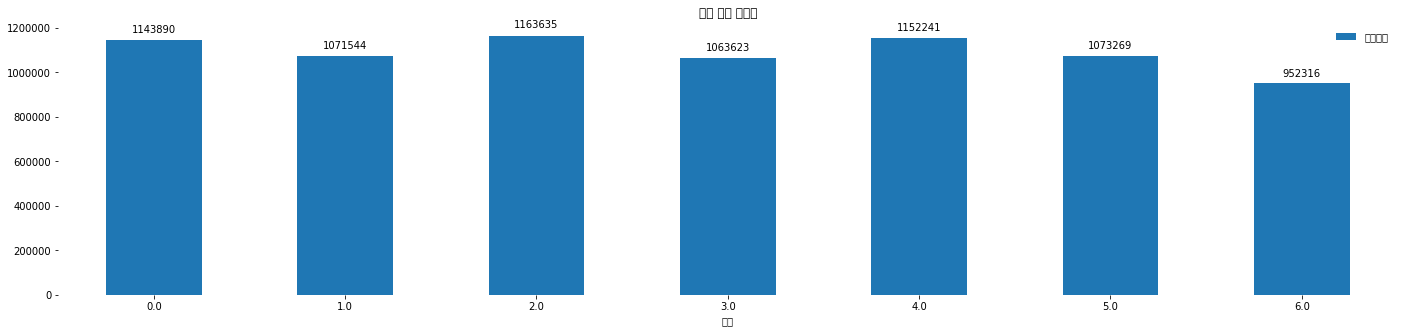

In [59]:
weekday = test2018.groupby(['요일'])[['이용건수']].agg('sum')
ax=weekday.plot(kind='bar', figsize=(24, 5), rot=0,title="요일 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

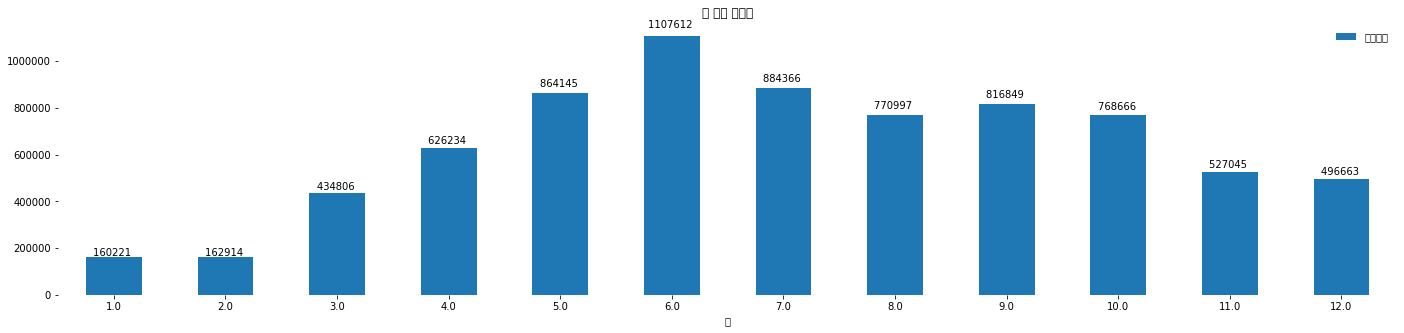

In [44]:
month = test2018.groupby(['월'])[['이용건수']].agg('sum')
ax=month.plot(kind='bar', figsize=(24, 5), rot=0,title="월 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

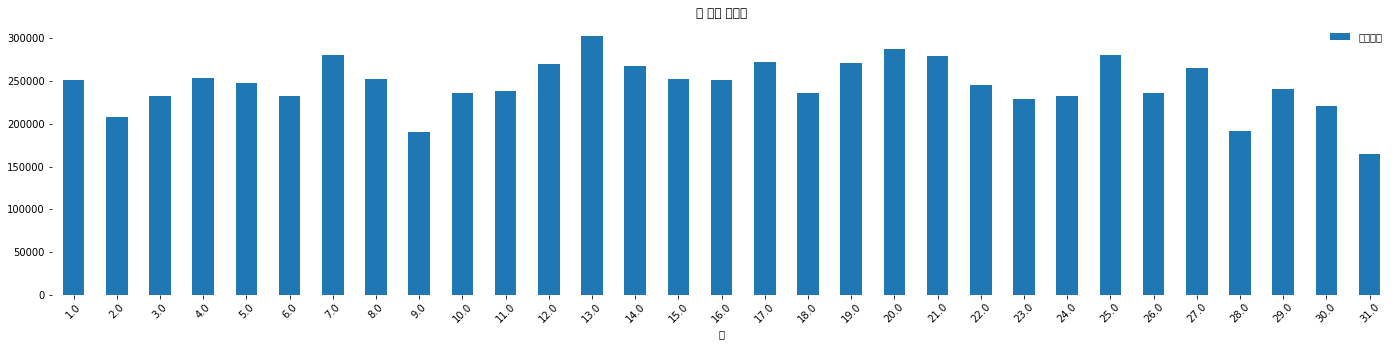

In [13]:
day = test2018.groupby(['일'])[['이용건수']].agg('sum')
ax=day.plot(kind='bar', figsize=(24, 5), rot=0, title="일 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

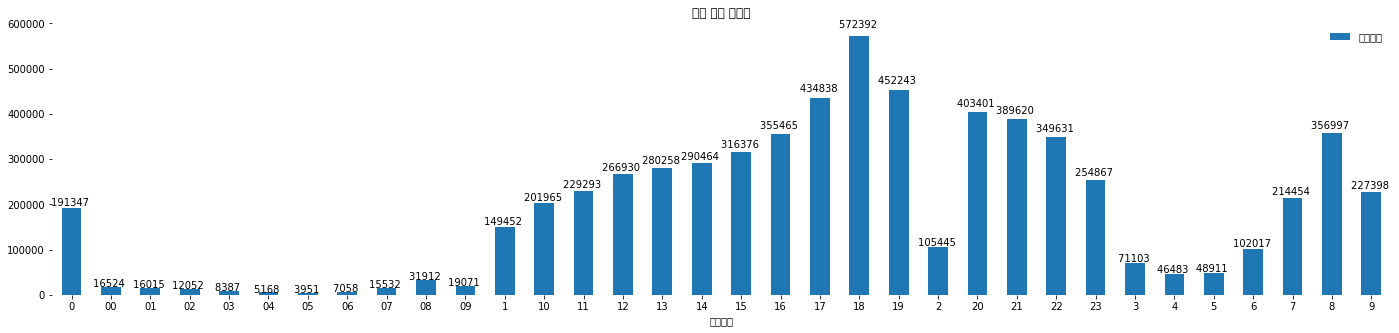

In [45]:
time=test2018.groupby('대여시간')['이용건수'].count()
ax=time.plot(kind='bar',figsize=(24, 5), rot=0, title="시간 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()
#0~9는 어디서 튀어나온 것이냐..

In [47]:
accident2018=pd.read_csv('data/2018교통사고_요일.csv',encoding='euc-kr')

In [50]:
accident2018=accident2018.drop(7,0)

KeyError: '[7] not found in axis'

In [51]:
accident2018

,요일,사고건수,사망자수,부상자수
0,일,192.0,3.0,212.0
1,월,187.0,1.0,197.0
2,화,216.0,5.0,226.0
3,수,227.0,4.0,240.0
4,목,227.0,1.0,242.0
5,금,221.0,1.0,237.0
6,토,201.0,3.0,219.0


In [54]:
accident2018['사고건수']=accident2018['사고건수'].astype(int)
accident2018['사망자수']=accident2018['사망자수'].astype(int)
accident2018['부상자수']=accident2018['부상자수'].astype(int)
accident2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      7 non-null      object
 1   사고건수    7 non-null      int32 
 2   사망자수    7 non-null      int32 
 3   부상자수    7 non-null      int32 
dtypes: int32(3), object(1)
memory usage: 516.0+ bytes
